In [46]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [39]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

numerical_features2 = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]
data_numerical2 = data[numerical_features2]

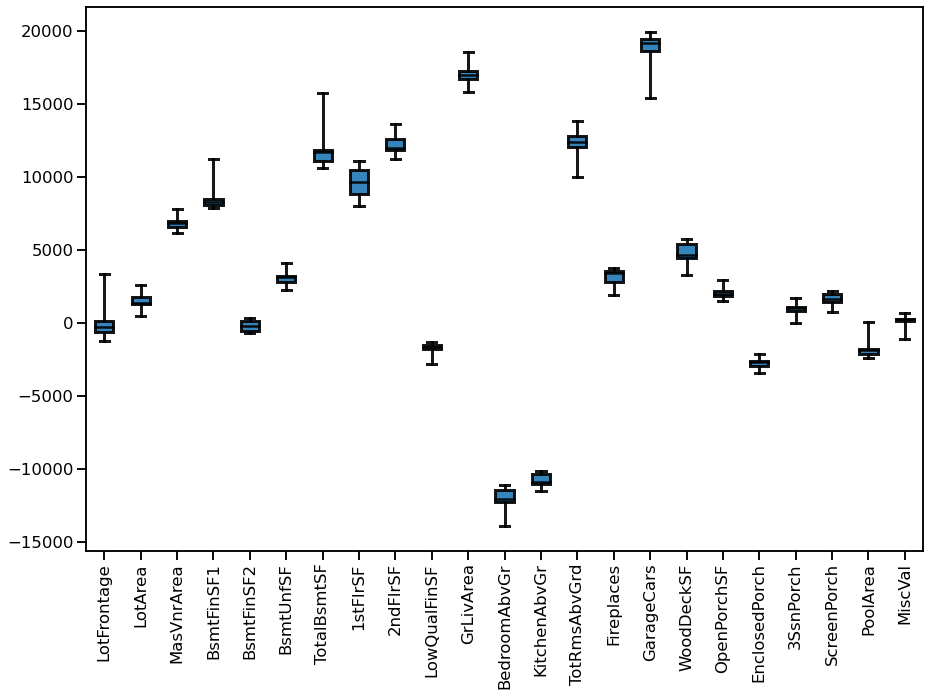

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())
cv_results = cross_validate(
    model, data_numerical2, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features2)
coefs.describe().loc[["min", "max"]]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

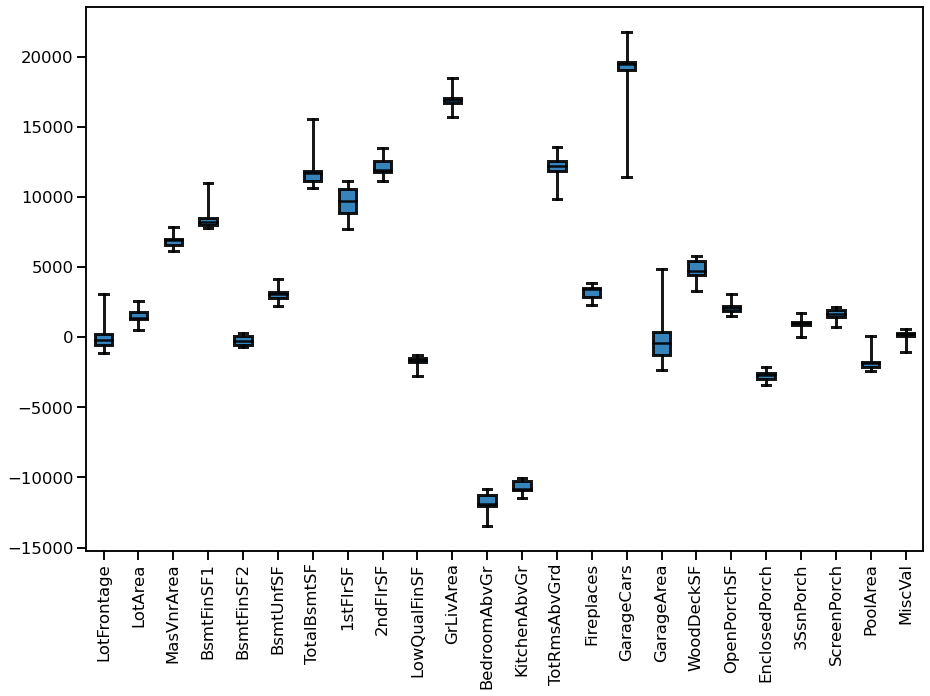

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), SimpleImputer(), RidgeCV())
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

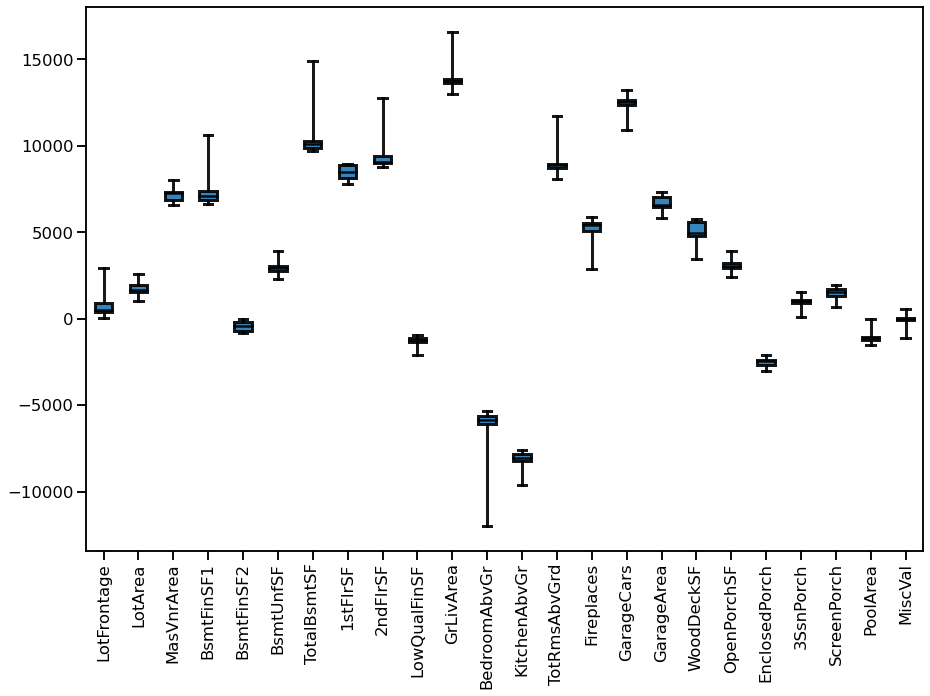

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import numpy as np


alphas=np.logspace(-1, 3, num=30)
model = make_pipeline(StandardScaler(), SimpleImputer(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

4
age               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64
 <=50K    37155
 >50K     11687
Name: class, dtype: int64


In [116]:
from sklearn.compose import make_column_selector

adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])
data.head(), target.head()

(   age  capital-gain  capital-loss  hours-per-week
 0   25             0             0              40
 1   38             0             0              50
 2   28             0             0              40
 3   44          7688             0              40
 4   18             0             0              30,
 0     <=50K
 1     <=50K
 2      >50K
 3      >50K
 4     <=50K
 Name: class, dtype: object)

[0.79856704 0.79283521 0.79668305 0.80487305 0.80036855 0.79914005
 0.79750205 0.7993448  0.80507781 0.80405405]
0.7998445658834604
[array([[0.52204276, 2.4667774 , 0.30602977, 0.53963505]]), array([[0.52606692, 2.40653282, 0.30817766, 0.54182433]]), array([[0.52425661, 2.45592287, 0.30812359, 0.54384342]]), array([[0.52037496, 2.45048201, 0.30916996, 0.53459728]]), array([[0.51925928, 2.51201042, 0.30424291, 0.54671495]]), array([[0.52173216, 2.4416315 , 0.30401707, 0.54128619]]), array([[0.52023528, 2.47372277, 0.30689298, 0.53637405]]), array([[0.52395804, 2.44532129, 0.30832579, 0.53825271]]), array([[0.51645436, 2.40508701, 0.30839363, 0.53512121]]), array([[0.51673694, 2.45048914, 0.30139428, 0.53553169]])]


TypeError: no numeric data to plot

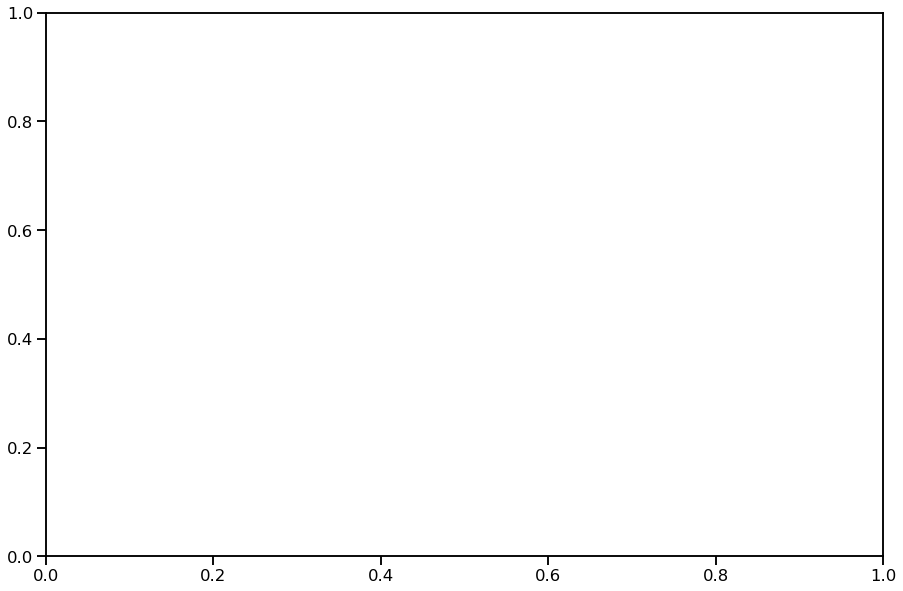

In [112]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True
)
print(cv_results["test_score"])
print(cv_results["test_score"].mean())

coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
print(coefs)
coefs = pd.DataFrame([coefs])

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

In [117]:
data.columns.to_list()

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [126]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [129]:
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

selector_num = make_column_selector(dtype_exclude=object)
selector_cat = make_column_selector(dtype_include=object)

num_cols = StandardScaler().fit_transform(data[selector_num(data)])
cat_cols = selector_cat(data)
cat_cols = OneHotEncoder(handle_unknown="ignore", sparse=False).fit_transform(data[cat_cols])

train = np.concatenate((num_cols, cat_cols), axis=1)

cv_res_num = cross_validate(LogisticRegression(), num_cols, target, cv=10)
print(cv_res_num["test_score"].mean())

cv_res_all = cross_validate(LogisticRegression(), train, target, cv=10)
print(cv_res_all["test_score"].mean())

0.7998445658834604


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.8516031249449878


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
